<a href="https://colab.research.google.com/github/anamacam/machine_learning/blob/master/agricola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Limpieza de Datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('BaseEVA_Agrícola2019_2020_2021.xlsx', index_col=0, skiprows=1)
df

,Departamento,Código Dane municipio,Municipio,Grupo cultivo,Subgrupo,Cultivo,Desagregación cultivo,Año,Periodo,Área sembrada,Área cosechada,Producción,Rendimiento,Ciclo del cultivo,Estado físico del cultivo,Código del cultivo,Nombre científico del cultivo
Código Dane departamento,,,,,,,,,,,,,,,,,
5,Antioquia,5001,Medellín,Cultivos Tropicales Tradicionales,Cultivos Tropicales Tradicionales,Café,Café,2019,2019,465.00,417.00,517.0,1.24,Permanente,Pergamino O Seco De Trilla,2030300,Coffea arabica L.
5,Antioquia,5001,Medellín,Cultivos Tropicales Tradicionales,Cultivos Tropicales Tradicionales,Café,Café,2020,2020,450.00,394.00,452.0,1.15,Permanente,Pergamino O Seco De Trilla,2030300,Coffea arabica L.
5,Antioquia,5001,Medellín,Cultivos Tropicales Tradicionales,Cultivos Tropicales Tradicionales,Café,Café,2021,2021,437.58,378.22,276.1,0.73,Permanente,Pergamino O Seco De Trilla,2030300,Coffea arabica L.
5,Antioquia,5001,Medellín,Cultivos Tropicales Tradicionales,Cultivos Tropicales Tradicionales,Caña,Caña Panelera,2019,2019,80.00,80.00,4800.0,60.00,Permanente,Caña O Verde,2030402,Saccharum officinarum L.
5,Antioquia,5001,Medellín,Cultivos Tropicales Tradicionales,Cultivos Tropicales Tradicionales,Caña,Caña Panelera,2020,2020,77.20,77.20,4632.0,60.00,Permanente,Caña O Verde,2030402,Saccharum officinarum L.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Vichada,99773,Cumaribo,Oleaginosas,Oleaginosas,Sacha inchi,Sacha inchi,2020,2020,3.00,3.00,4.5,1.50,Permanente,En Fresco,2070500,Plukenetia volubilis
99,Vichada,99773,Cumaribo,Oleaginosas,Oleaginosas,Sacha inchi,Sacha inchi,2021,2021,3.00,3.00,4.5,1.50,Permanente,En Fresco,2070500,Plukenetia volubilis
99,Vichada,99773,Cumaribo,Raíces y Tubérculos,Raíces y Tubérculos,Yuca,Yuca consumo en fresco,2019,2019A,490.00,490.00,4900.0,10.00,Transitorio,En Fresco,1081001,Manihot esculenta


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65733 entries, 5 to 99
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Departamento                   65733 non-null  object 
 1   Código Dane municipio          65733 non-null  int64  
 2   Municipio                      65733 non-null  object 
 3   Grupo cultivo                  65733 non-null  object 
 4   Subgrupo                       65733 non-null  object 
 5   Cultivo                        65733 non-null  object 
 6   Desagregación cultivo          65733 non-null  object 
 7   Año                            65733 non-null  int64  
 8   Periodo                        65733 non-null  object 
 9   Área sembrada                  65733 non-null  float64
 10  Área cosechada                 65733 non-null  float64
 11  Producción                     65733 non-null  float64
 12  Rendimiento                    65733 non-null  float64

In [ ]:
# Principales cultivos con mayor área sembrada
top_cultivos = df.groupby('Cultivo')['Área sembrada'].sum().sort_values(ascending=False).head(10)

In [ ]:
# Participación de los principales cultivos en el área sembrada
area_total = df['Área sembrada'].sum()
top_cultivos_percentage = (top_cultivos / area_total) * 100

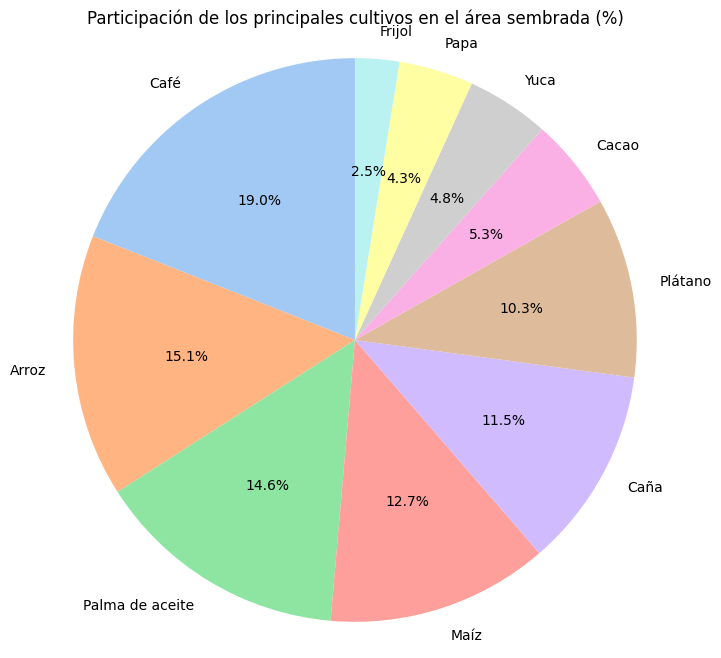

In [ ]:
# Visualización en gráfico
plt.figure(figsize=(8, 8))
plt.pie(top_cultivos_percentage, labels=top_cultivos_percentage.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Participación de los principales cultivos en el área sembrada (%)')
plt.axis('equal')
plt.show()

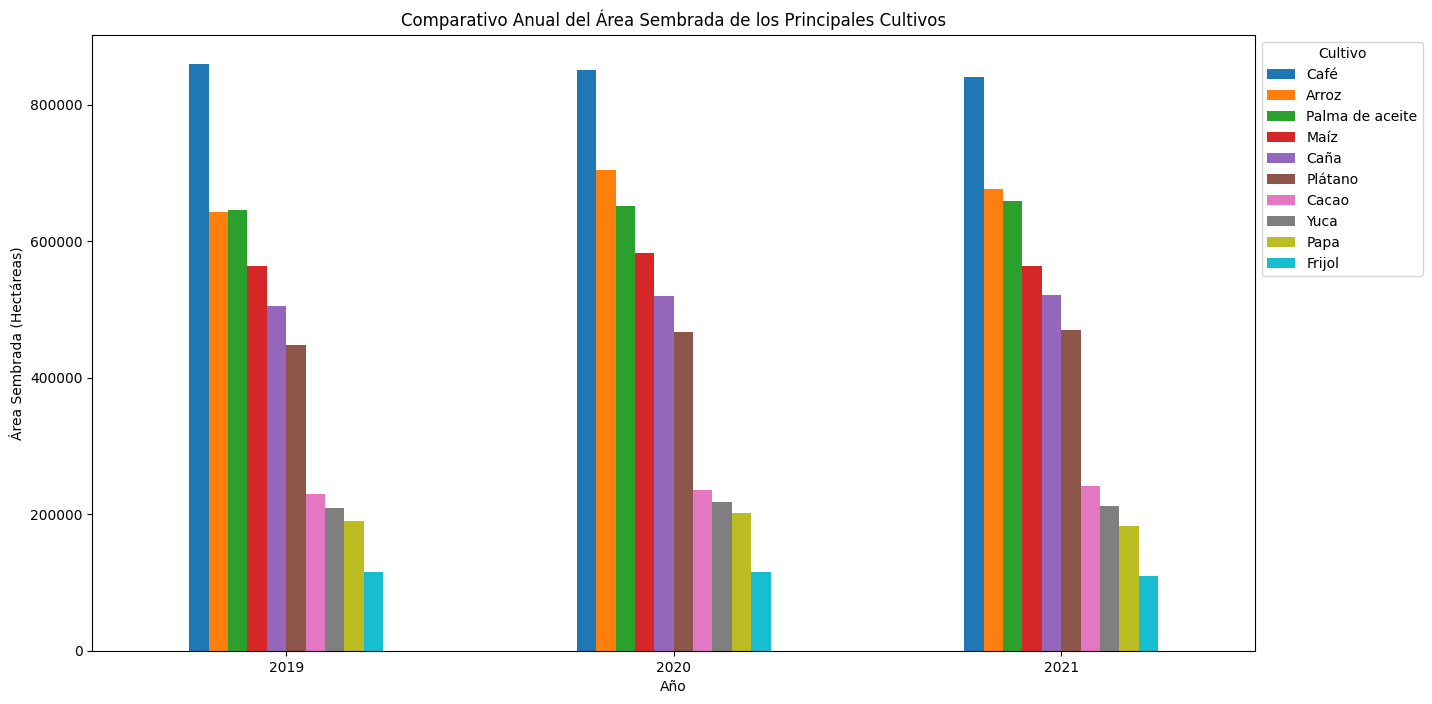

In [ ]:
# Comparativo anual del área sembrada de los principales cultivos

# Agrupar por año y cultivo, y sumar el área sembrada
area_sembrada_anual = df.groupby(['Año', 'Cultivo'])['Área sembrada'].sum().unstack()

# Seleccionar los 10 principales cultivos
top_cultivos_list = top_cultivos.index.tolist()
area_sembrada_anual_top = area_sembrada_anual[top_cultivos_list]

# Visualización
area_sembrada_anual_top.plot(kind='bar', figsize=(15, 8))
plt.title('Comparativo Anual del Área Sembrada de los Principales Cultivos')
plt.xlabel('Año')
plt.ylabel('Área Sembrada (Hectáreas)')
plt.xticks(rotation=0)
plt.legend(title='Cultivo', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
# grafico comparativo con , area cosechada , produccion y rendimiento

# Agrupar por año y cultivo, y sumar el área cosechada, producción y rendimiento
comparativo_anual = df.groupby(['Año', 'Cultivo'])[['Área cosechada', 'Producción', 'Rendimiento']].sum().unstack()

In [ ]:
# Agrupar por año y cultivo, y sumar el área cosechada, producción y rendimiento
comparativo_anual = df.groupby(['Año', 'Cultivo'])

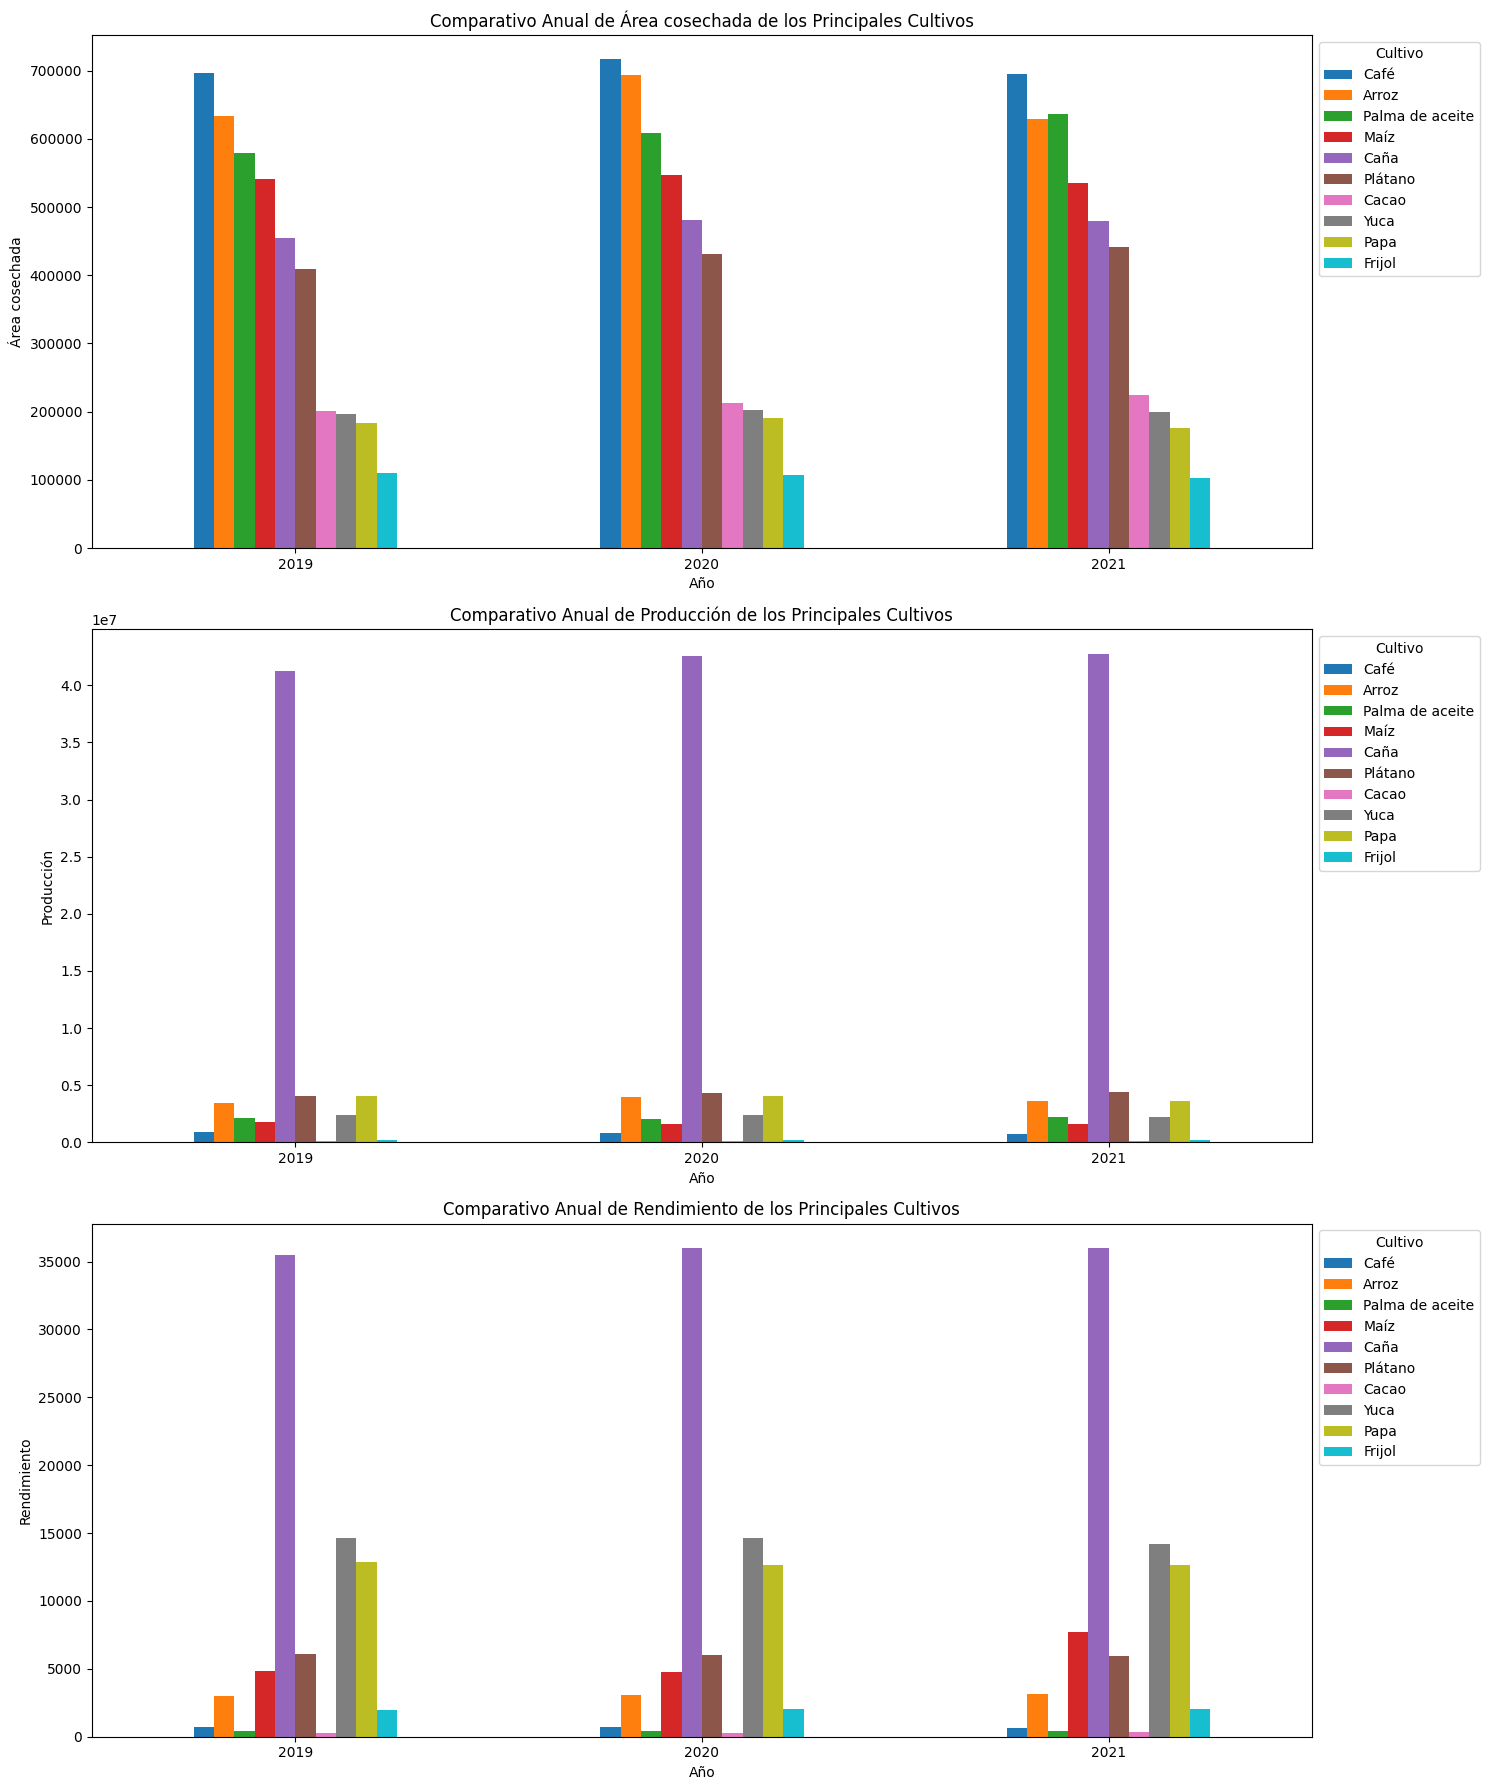

In [ ]:
# grafica

# Selecciona los 10 principales cultivos
top_cultivos_list = top_cultivos.index.tolist()

# Crea subplots para cada variable (Área cosechada, Producción, Rendimiento)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))

# Itera sobre las variables y crea los gráficos
for i, variable in enumerate(['Área cosechada', 'Producción', 'Rendimiento']):
  comparativo_anual_variable = df.groupby(['Año', 'Cultivo'])[variable].sum().unstack()
  comparativo_anual_variable_top = comparativo_anual_variable[top_cultivos_list]
  comparativo_anual_variable_top.plot(kind='bar', ax=axes[i])
  axes[i].set_title(f'Comparativo Anual de {variable} de los Principales Cultivos')
  axes[i].set_xlabel('Año')
  axes[i].set_ylabel(variable)
  axes[i].tick_params(axis='x', rotation=0)
  axes[i].legend(title='Cultivo', loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()


<ipython-input-68-398f4249adb2>:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  tasa_crecimiento_area = area_sembrada_anual.pct_change()


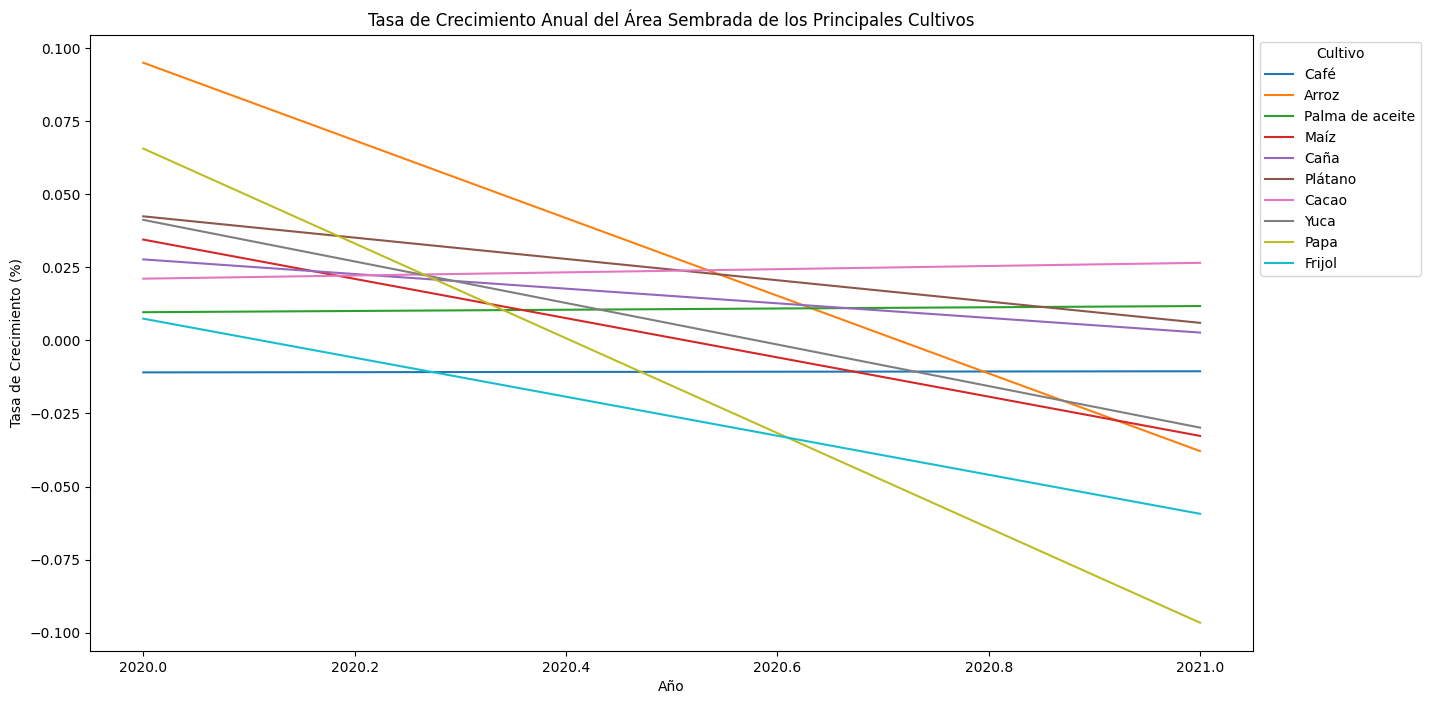

In [ ]:
# Análisis de Tendencias en el Área Sembrada

# Calcular la tasa de crecimiento anual del área sembrada para cada cultivo
tasa_crecimiento_area = area_sembrada_anual.pct_change()

# Visualizar la tasa de crecimiento anual del área sembrada para los 10 principales cultivos
tasa_crecimiento_area[top_cultivos_list].plot(kind='line', figsize=(15, 8))
plt.title('Tasa de Crecimiento Anual del Área Sembrada de los Principales Cultivos')
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento (%)')
plt.xticks(rotation=0)
plt.legend(title='Cultivo', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Interpretación de los resultados:**

- **Tendencia general a la baja:** La mayoría de los cultivos muestran una tendencia decreciente en su tasa de crecimiento durante el período analizado. Esto sugiere una disminución en la expansión de las áreas dedicadas a estos cultivos.

- **Desempeño diferenciado por cultivo:** Si bien la tendencia general es a la baja, existen diferencias notables entre los cultivos:

 - **Café:** Mantiene una tasa de crecimiento relativamente estable y cercana a cero, lo que indica que el área sembrada de café se ha mantenido relativamente constante.

 - **Arroz y palma de aceite:** Presentan una disminución más pronunciada en su tasa de crecimiento, lo que sugiere una reducción en la expansión de estas áreas.
 - **Otros cultivos:** Cultivos como maíz, caña, plátano, cacao, yuca, papa y frijol también muestran una tendencia a la baja, aunque con variaciones en la magnitud de la disminución.

<ipython-input-69-1076a9611b5d>:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  tasa_crecimiento_produccion = df.groupby(['Año', 'Cultivo'])['Producción'].sum().unstack().pct_change()


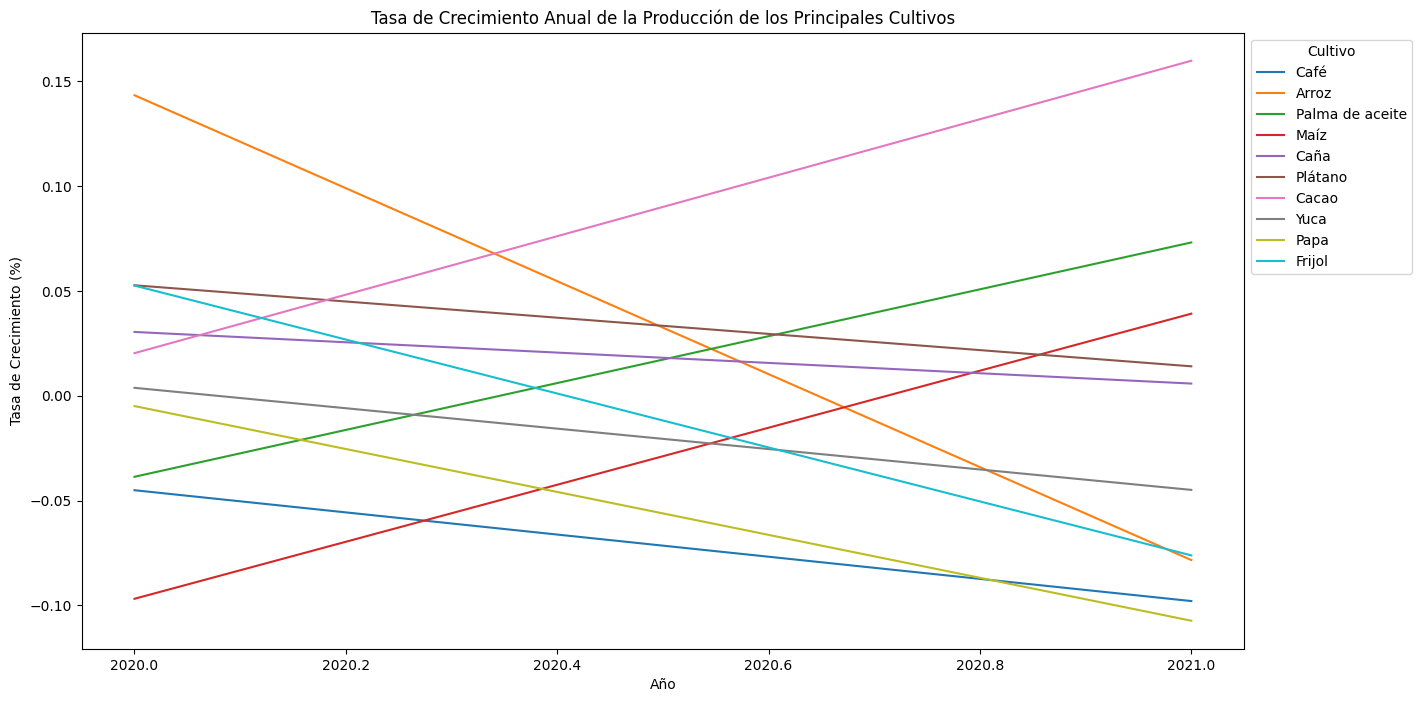

In [ ]:
# Análisis de Tendencias en la Producción

# Calcular la tasa de crecimiento anual de la producción para cada cultivo
tasa_crecimiento_produccion = df.groupby(['Año', 'Cultivo'])['Producción'].sum().unstack().pct_change()

# Visualizar la tasa de crecimiento anual de la producción para los 10 principales cultivos
tasa_crecimiento_produccion[top_cultivos_list].plot(kind='line', figsize=(15, 8))
plt.title('Tasa de Crecimiento Anual de la Producción de los Principales Cultivos')
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento (%)')
plt.xticks(rotation=0)
plt.legend(title='Cultivo', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Interpretación de los resultados:**

- **Tendencia general a la baja:** La mayoría de los cultivos muestran una tendencia decreciente en su tasa de crecimiento durante el período analizado. Esto sugiere una disminución en la producción de estos cultivos en comparación con el año anterior.

- **Desempeño diferenciado por cultivo:** Si bien la tendencia general es a la baja, existen diferencias notables entre los cultivos:

  - Algunos cultivos, como el café y el maíz, muestran una disminución más pronunciada en su tasa de crecimiento, lo que indica una reducción más significativa en su producción.
  - Otros cultivos, como el arroz y la yuca, presentan una disminución menos pronunciada, sugiriendo una menor reducción en su producción.
  - Incluso hay algunos cultivos, como el plátano, que muestran un ligero crecimiento en su tasa de producción durante el período analizado.

<ipython-input-70-df5b557c75c5>:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  tasa_crecimiento_rendimiento = df.groupby(['Año', 'Cultivo'])['Rendimiento'].sum().unstack().pct_change()


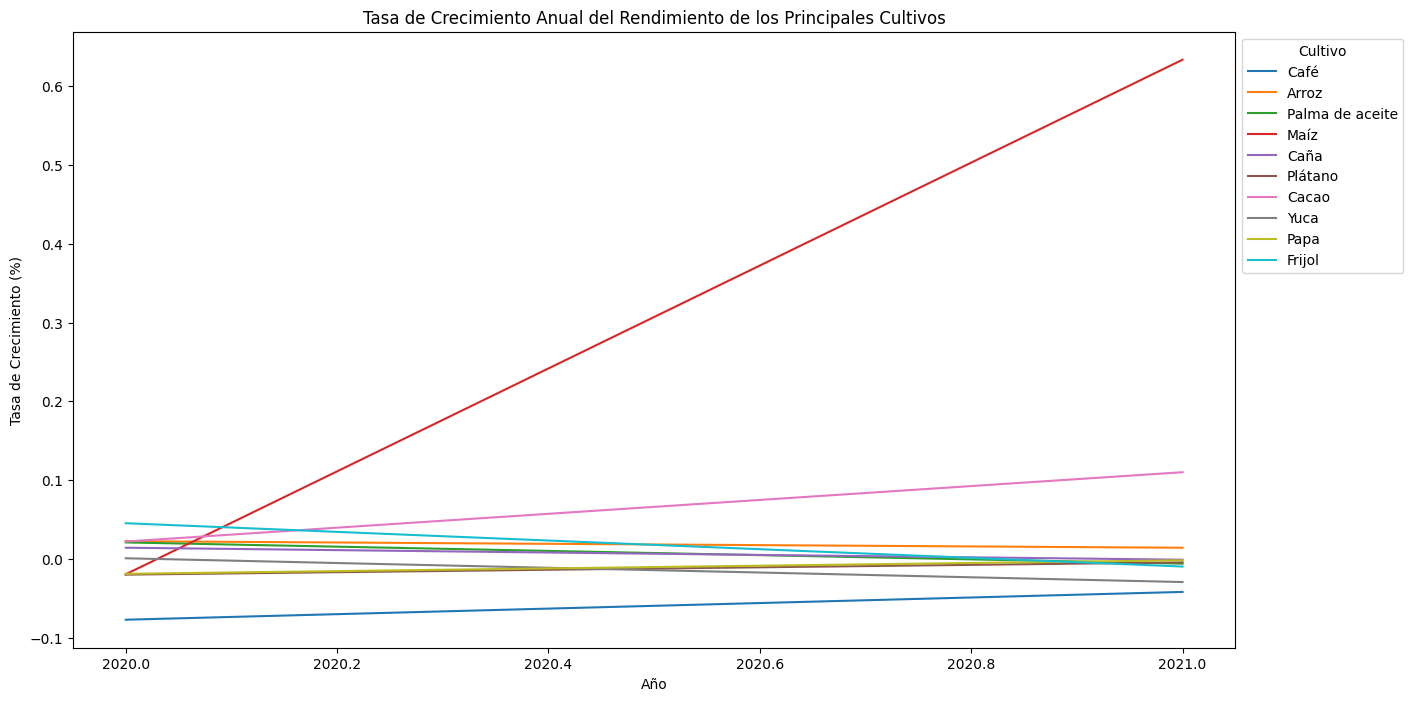

In [ ]:
# Análisis de Tendencias en el Rendimiento

# Calcular la tasa de crecimiento anual del rendimiento para cada cultivo
tasa_crecimiento_rendimiento = df.groupby(['Año', 'Cultivo'])['Rendimiento'].sum().unstack().pct_change()

# Visualizar la tasa de crecimiento anual del rendimiento para los 10 principales cultivos
tasa_crecimiento_rendimiento[top_cultivos_list].plot(kind='line', figsize=(15, 8))
plt.title('Tasa de Crecimiento Anual del Rendimiento de los Principales Cultivos')
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento (%)')
plt.xticks(rotation=0)
plt.legend(title='Cultivo', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


**Interpretación de los resultados:**

- **Tendencia general al alza:** La mayoría de los cultivos muestran una tendencia creciente en su tasa de crecimiento del rendimiento durante el período analizado. Esto sugiere un aumento en la productividad de estos cultivos, es decir, se está produciendo más cantidad de producto por unidad de tierra cultivada.

- **Desempeño diferenciado por cultivo:** Si bien la tendencia general es al alza, existen diferencias notables entre los cultivos:

  - **Café:** Muestra un crecimiento moderado en su rendimiento, lo que indica una mejora gradual en la productividad de este cultivo.
  - **Arroz y palma de aceite:** Presentan un crecimiento más estable y moderado en comparación con otros cultivos.
  - **Otros cultivos:** Cultivos como maíz, caña, plátano, cacao, yuca, papa y frijol muestran un crecimiento más dinámico en su rendimiento, lo que sugiere una mejora significativa en su productividad.